In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings


In [ ]:
#@Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?
df = pd.read_excel('flight_price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [30]:
#@What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.
flight_price = df['Price']

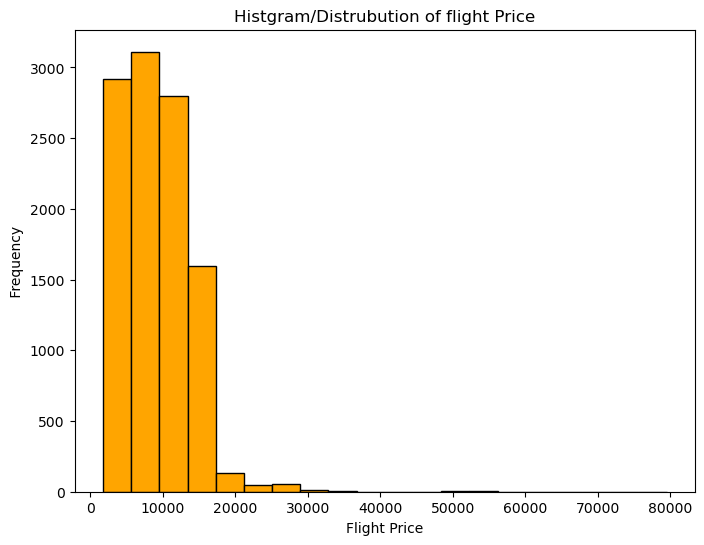

In [31]:
plt.figure(figsize=(8,6))
plt.hist(flight_price , color= 'Orange' ,bins=20 ,edgecolor='black')
plt.title('Histgram/Distrubution of flight Price')
plt.xlabel('Flight Price')
plt.ylabel( ' Frequency ')
plt.show()

In [32]:
#@# What is the range of prices in the dataset? What is the minimum and maximum price?
Flightprice_ = df['Price']
Min_=Flightprice_.min()
Max_=Flightprice_.max()
price_range= Min_ - Max_
print(f" Min Price is : {Min_}")
print(f" Max Price is : {Max_}")
print(f" Price Range is : {price_range}")

 Min Price is : 1759
 Max Price is : 79512
 Price Range is : -77753


(array([0]), [Text(0, 0, '0')])

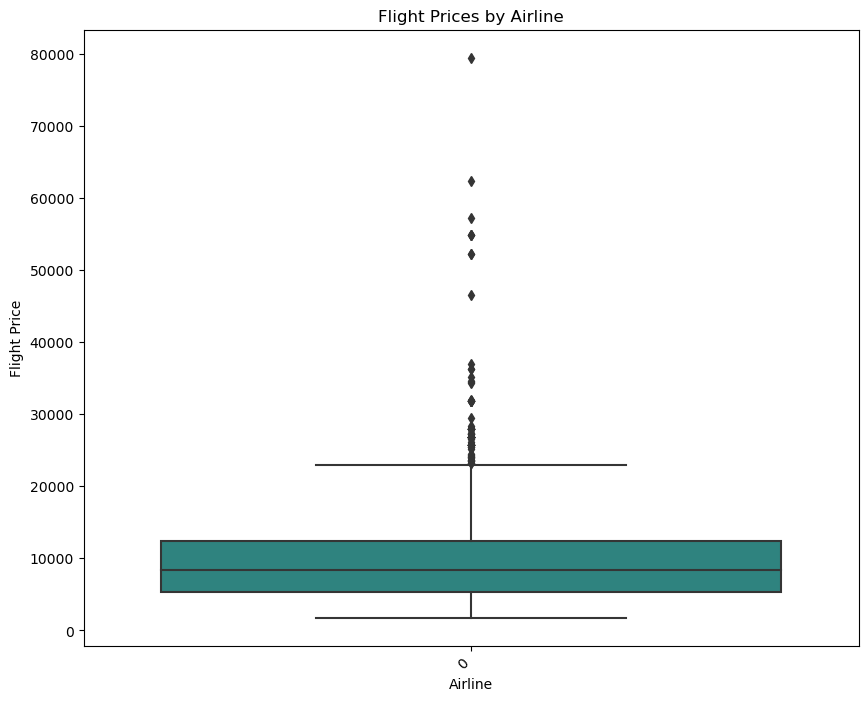

In [33]:
#@How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.
plt.figure(figsize=(10, 8))
sns.boxplot( data=flight_price, palette='viridis')
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Flight Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability


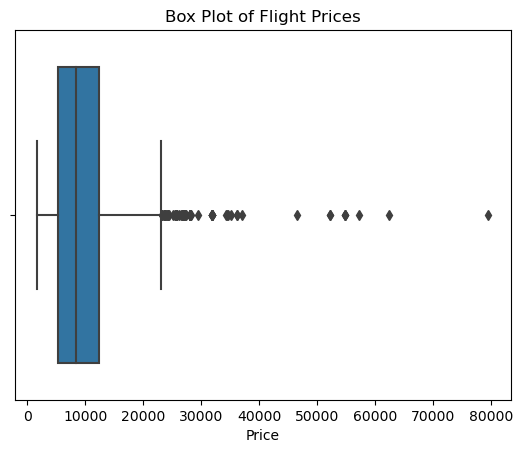

Z-Score Outliers: 123      27430
396      36983
486      26890
510      26890
597      25139
         ...  
10353    24210
10364    57209
10383    26890
10439    31825
10511    26480
Name: Price, Length: 96, dtype: int64
IQR Outliers: 123      27430
396      36983
486      26890
510      26890
597      25139
         ...  
10353    24210
10364    57209
10383    26890
10439    31825
10511    26480
Name: Price, Length: 94, dtype: int64


In [37]:
#@ Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

sns.boxplot(x=df['Price'])
plt.title('Box Plot of Flight Prices')
plt.show()

# Z-Score Method
z_scores = stats.zscore(df['Price'])
outliers_z = (z_scores > 3) | (z_scores < -3)
outlier_values_z = df['Price'][outliers_z]
print("Z-Score Outliers:", outlier_values_z)

# IQR Method
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = (df['Price'] < lower_bound) | (df['Price'] > upper_bound)
outlier_values_iqr = df['Price'][outliers_iqr]
print("IQR Outliers:", outlier_values_iqr)


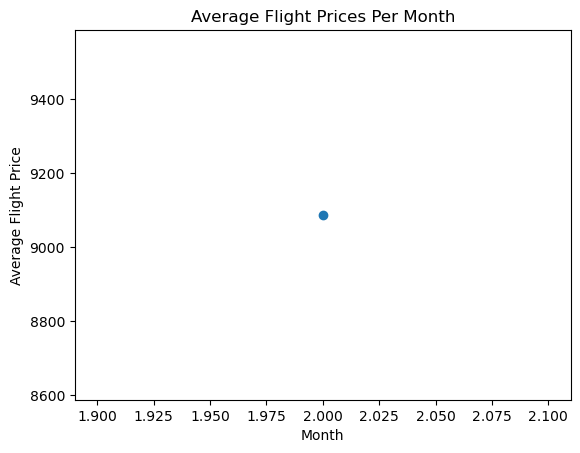

TypeError: at least two inputs are required; got 1.

In [42]:
#You are working for a travel agency, and your boss has asked you to analyze the Flight Price datasetto identify the peak travel season. What features would you analyze to identify the peak season, and how
#would you present your findings to your boss?

# Convert 'dep_date' to datetime
df['departure_date'] = pd.to_datetime(df['Dep_Time'])

# Extract features
df['month'] = df['departure_date'].dt.month
df['season'] = (df['departure_date'].dt.month % 12 + 3) // 3

# Visualization: Average flight prices per month
avg_prices_by_month = df.groupby('month')['Price'].mean()
plt.plot(avg_prices_by_month, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Flight Price')
plt.title('Average Flight Prices Per Month')
plt.show()

# Statistical Analysis: ANOVA for comparing prices between seasons
seasons = df['season'].unique()
anova_results = stats.f_oneway(*[df['Price'][df['season'] == season] for season in seasons])
print("ANOVA Results:", anova_results)


TypeError: 'method' object is not subscriptable

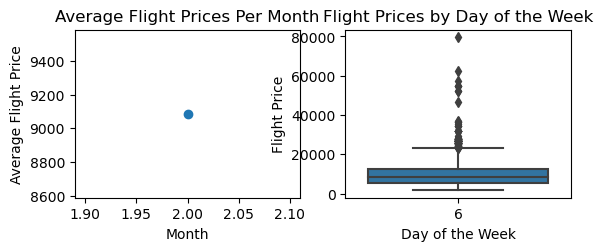

In [50]:
#@@@ You are a data analyst for a flight booking website, and you have been asked to analyze the FlightPrice dataset to identify any trends in flight prices. What features would you analyze to identify these
#trends, and what visualizations would you use to present your findings to your team?


# Convert 'departure_date' to datetime
df['departure_date'] = pd.to_datetime(df['Dep_Time'])

# Feature Engineering
df['day_of_week'] = df['departure_date'].dt.dayofweek
df['month'] = df['departure_date'].dt.month
df['season'] = (df['departure_date'].dt.month % 12 + 3) // 3

# Visualization 1: Average Flight Prices Per Month
avg_prices_by_month = df.groupby('month')['Price'].mean()
plt.subplot(2, 2, 1)
plt.plot(avg_prices_by_month, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Flight Price')
plt.title('Average Flight Prices Per Month')

# Visualization 2: Flight Prices by Day of the Week
plt.subplot(2, 2, 2)
sns.boxplot(x='day_of_week', y='Price', data=df)
plt.xlabel('Day of the Week')
plt.ylabel('Flight Price')
plt.title('Flight Prices by Day of the Week')

# Visualization 3: Average Flight Prices by Route
avg_prices_by_route = df.groupby['Price'].mean()
plt.subplot(2, 2, 3)
avg_prices_by_route.plot(kind='bar')
plt.xlabel('Route')
plt.ylabel('Average Flight Price')
plt.title('Average Flight Prices by Route')
plt.xticks(rotation=45)

# Visualization 4: Scatter plot of Flight Prices vs Booking Window
plt.subplot(2, 2, 4)
plt.scatter(df['booking_window'], df['Price'], alpha=0.5)
plt.xlabel('Booking Window (days)')
plt.ylabel('Price')
plt.title('Flight Prices vs Booking Window')

plt.tight_layout()
plt.show()

In [51]:

#Features to Analyze:

#Route Analysis:
#Examine price variations based on different routes.

#Booking Time Analysis:
#Investigate how the timing of booking impacts flight prices.

#Time of Travel Analysis:
#Identify seasonal trends and analyze pricing variations over time.

#Aircraft Type Analysis:
#Explore how different aircraft types influence flight prices.

#Class Analysis:
#Analyze the impact of travel class on flight prices.

#Promotions and Discounts:
#Investigate the influence of promotions on pricing.

#Market Conditions:
#Consider external factors affecting flight prices.

#Presentation of Findings:
#Executive Summary:
#Provide a concise overview of key findings.

#Route-Based Analysis:
#Visualize average prices for different routes.

#Booking Time Insights:
#Show the relationship between booking time and prices.

#Time of Travel Patterns:
#Illustrate seasonal trends and peak travel times.

#Aircraft Type and Class Analysis:
#Present the impact of aircraft type and class on pricing.

#Promotions and Discounts Impact:
#Display the influence of promotions on flight prices.

#Market Conditions Overview:

#Summarize external factors affecting prices.

#Recommendations:
#Provide actionable suggestions for pricing strategies.

#Interactive Dashboards:

Consider creating dashboards for interactive exploration.
Q&A Session:

Conclude with a question-and-answer session for clarity.

SyntaxError: invalid syntax (1760827798.py, line 8)